<a href="https://colab.research.google.com/github/KUNALKEDARI20/Decision-Tree-Algorithm/blob/main/Assignment_no_11_Company_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**------------------------COMPANY DATASET-------------------------**

**Problem Statement**--->>
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [111]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [112]:
# Load Dataset
company_df=pd.read_csv('/content/Company_Data.csv')
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


▶**PREPROCESSING**

In [113]:
# Preprocessing
le=preprocessing.LabelEncoder()

company_df["ShelveLoc"]=le.fit_transform(company_df["ShelveLoc"])


In [114]:
company_df['Urban']=le.fit_transform(company_df['Urban'])

In [115]:
company_df['US']=le.fit_transform(company_df['US'])

In [116]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [117]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [118]:
# Assign a new column-Sale to company_df
#labels=['Low', 'Medium', 'High']: This assigns labels to the corresponding bins.
# If a value falls in the range (0, 4], it will be labeled as 'Low',
#if it falls in (4, 9], it will be labeled as 'Medium', and if it falls in (9, 15], it will be labeled as 'High'.

company_df=company_df.assign(Sale=pd.cut(company_df['Sales'],
                               bins=[ 0, 4, 9,15],
                               labels=['Low', 'Medium', 'High']))

In [119]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Medium


**Split the data into X and Y**

In [120]:
X=company_df.copy()
X=X.iloc[:,0:6]
X

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [121]:
Y=company_df['ShelveLoc']

**Coverting the entire data into Train and Test Dataset**

In [122]:
# Spliting then data into 80-20% ratio
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [123]:
x_train.shape

(320, 6)

In [124]:
x_test.shape

(80, 6)

In [125]:
y_train.shape

(320,)

In [126]:
y_test.shape

(80,)

**Decision Tree Algorithm**

In [133]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=25)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=25)

[Text(0.5, 0.875, 'x[0] <= 6.165\nentropy = 1.45\nsamples = 320\nvalue = [76, 70, 174]'),
 Text(0.25, 0.625, 'x[0] <= 5.315\nentropy = 1.113\nsamples = 110\nvalue = [54, 2, 54]'),
 Text(0.125, 0.375, 'x[5] <= 159.5\nentropy = 1.117\nsamples = 74\nvalue = [44, 2, 28]'),
 Text(0.0625, 0.125, 'entropy = 1.039\nsamples = 70\nvalue = [44, 1, 25]'),
 Text(0.1875, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.375, 0.375, 'x[1] <= 116.0\nentropy = 0.852\nsamples = 36\nvalue = [10, 0, 26]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]'),
 Text(0.4375, 0.125, 'entropy = 0.951\nsamples = 27\nvalue = [10, 0, 17]'),
 Text(0.75, 0.625, 'x[0] <= 10.485\nentropy = 1.329\nsamples = 210\nvalue = [22, 68, 120]'),
 Text(0.625, 0.375, 'x[5] <= 119.5\nentropy = 1.208\nsamples = 158\nvalue = [20, 30, 108]'),
 Text(0.5625, 0.125, 'entropy = 0.992\nsamples = 89\nvalue = [15, 6, 68]'),
 Text(0.6875, 0.125, 'entropy = 1.26\nsamples = 69\nvalue = [5, 24, 40]'),
 Text(0

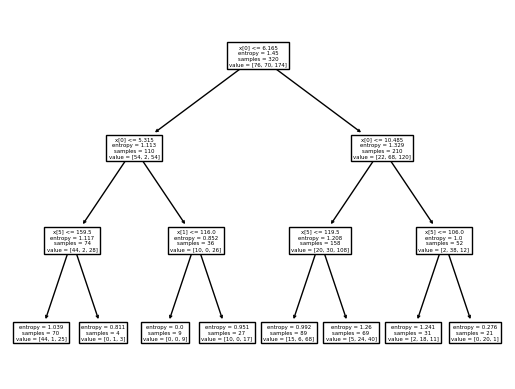

In [134]:
# Plotting of decision tree
tree.plot_tree(model)

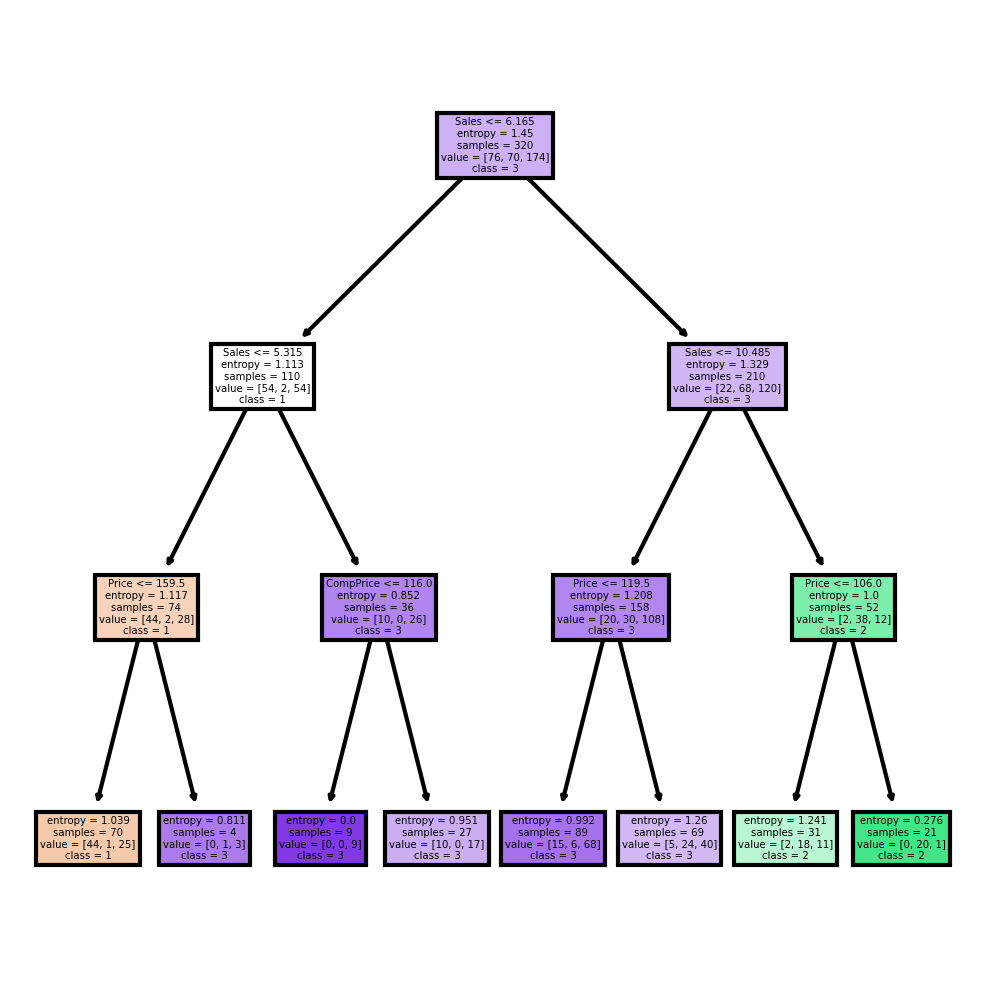

In [135]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [136]:
# Predicting on test dataset

preds=model.predict(x_test)# predicting on test data set
pd.Series(preds).value_counts()# getting the count of each category

2    52
0    18
1    10
dtype: int64

In [137]:
 # getting the 2 way table to understand the correct and w
pd.crosstab(y_test,preds)

col_0,0,1,2
ShelveLoc,,,
0,6,1,13
1,0,6,9
2,12,3,30


In [138]:
# Accuracy
np.mean(preds==y_test)


0.525

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [140]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=25)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

In [142]:
#Prediction and computing the accuracy
pred_gini=model.predict(x_test)
np.mean(pred_gini==y_test)

0.525

**Decision Tree Regression Example**

In [144]:
from sklearn.tree import DecisionTreeRegressor

array = company_df.values
X = array[:,0:3]
y = array[:,3]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=25)

In [151]:
model_reg= DecisionTreeRegressor()
model_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [157]:
#Find the accuracy
model_reg.score(X_test,y_test)

-1.103054325017486